In [38]:
from glm.glm import GLM
from glm.families import Gaussian
import statsmodels as sm

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np



%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

https://github.com/GalvanizeDataScience/inferential-regression

Ordinary least squares within statsmodels http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html


One more example of statsmodels with a linear regression
https://datatofish.com/statsmodels-linear-regression/

statsmodels http://www.statsmodels.org/dev/index.html

how to get coefficients from statsmodels
https://stackoverflow.com/questions/47388258/how-to-extract-the-regression-coefficient-from-statsmodels-api?rq=1



In [13]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Duncan.csv'

In [14]:
# target is prestige of job
prestige = pd.read_csv(url)

In [15]:
prestige.head()

,Unnamed: 0,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f183e8d8748>,
      dtype=object)

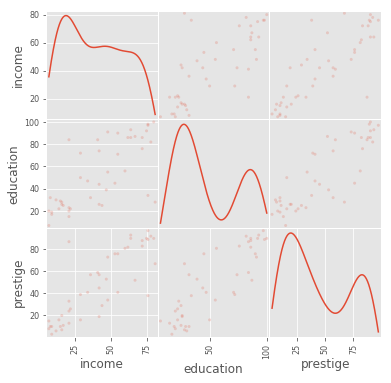

In [43]:
scatter_matrix(prestige, alpha=0.2, figsize=(6,6), diagonal='kde')

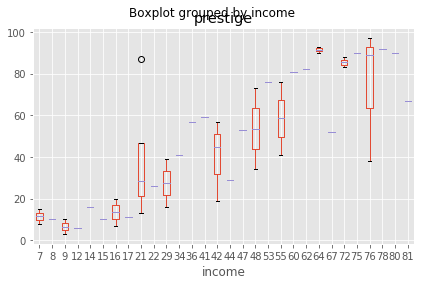

In [50]:
prestige.boxplot(['prestige'], by ='income')
plt.tight_layout()

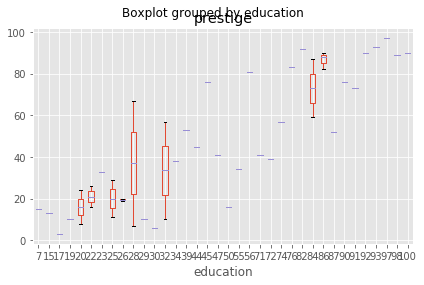

In [51]:
prestige.boxplot(['prestige'], by ='education')
plt.tight_layout()

In [39]:
# target is average credit card expentiure (AVGEXP)
credit_card = statsmodels.datasets.ccard.load_pandas().data

In [42]:
credit_card.head()

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f183f132c50>,
      dtype=object)

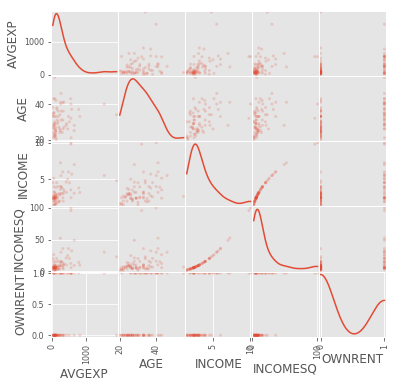

In [40]:
scatter_matrix(credit_card, alpha=0.2, figsize=(6,6), diagonal='kde')

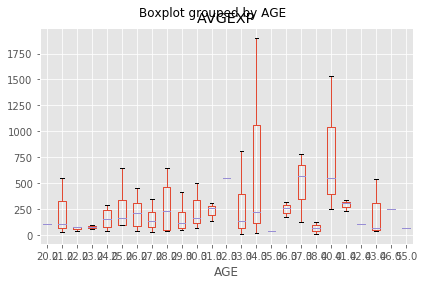

In [54]:
credit_card.boxplot(['AVGEXP'], by='AGE')
plt.tight_layout()

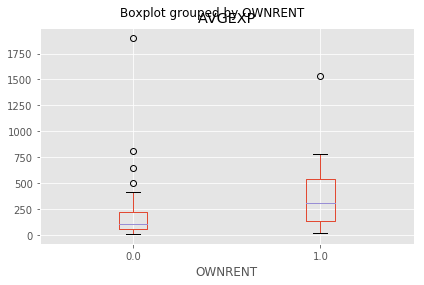

In [59]:
credit_card.boxplot(['AVGEXP'], by='OWNRENT')
plt.tight_layout()

In [61]:
credit_linear_model = GLM(family=Gaussian())
credit_linear_model.fit(credit_card, formula = 'AVGEXP ~ AGE')
credit_linear_model.summary()

Gaussian GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                 28.37          168.03
AGE                        7.49            5.24


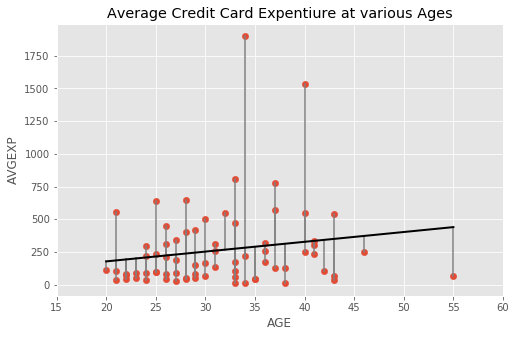

In [95]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(credit_card.AGE, credit_card.AVGEXP, s=40)
ax.set_xlabel('AGE')
ax.set_ylabel('AVGEXP')
ax.set_title('Average Credit Card Expentiure at various Ages')

def make_credit_scatter_line(ax, label='Linear Regression'):
    x = np.linspace(20,55, num=250)
    ax.plot(x, credit_linear_model.coef_[0] + credit_linear_model.coef_[1]*x,
           linewidth=2, c='black', label=label)
    ax.set_xlim(15,60)
    
for index, row in credit_card.iterrows():
    t = row['AGE']
    pred = credit_linear_model.coef_[0] + credit_linear_model.coef_[1]*t
    ax.plot((t,t), (row['AVGEXP'], pred), c='grey')
make_credit_scatter_line(ax)

Most points have equal variance except for a few outlier points that have higher AVGEXP for their age.

In [63]:
prestige_linear_model = GLM(family=Gaussian())
prestige_linear_model.fit(prestige, formula = 'prestige ~ income')
prestige_linear_model.summary()

Gaussian GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                  2.46            5.19
income                     1.08            0.11


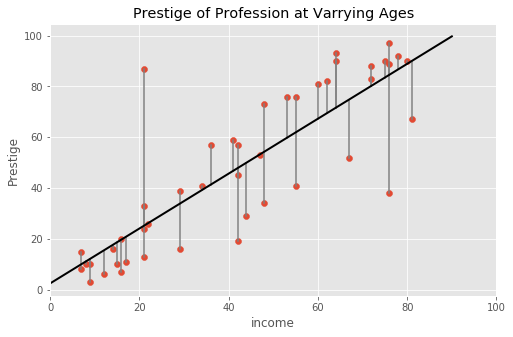

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(prestige.income, prestige.prestige)
ax.set_xlabel('income')
ax.set_ylabel('Prestige')
ax.set_title('Prestige of Profession at Varrying Ages')

def make_prestige_line(ax, label='Linear Regression'):
    x = np.linspace(0,90, num=250)
    ax.plot(x, prestige_linear_model.coef_[0] + prestige_linear_model.coef_[1]*x,
           label=label, linewidth=2, c='black')
    ax.set_xlim(0,100)
    
for index, row in prestige.iterrows():
    t = row['income']
    pred = prestige_linear_model.coef_[0] + prestige_linear_model.coef_[1]*t
    # tuple of x's and tuple of y's to draw a line between
    ax.plot((t,t), (row['prestige'], pred), color='grey')
    
make_prestige_line(ax)

Apart from a one or two points the variance between prestiege and income is fairly even.

In [113]:
credit_card['log_avgexp'] = np.log(credit_card['AVGEXP'])

In [115]:
credit_linear_model = GLM(family=Gaussian())
credit_linear_model.fit(credit_card, formula = 'log_avgexp ~ AGE')
credit_linear_model.summary()

Gaussian GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                  4.37            0.60
AGE                        0.02            0.02


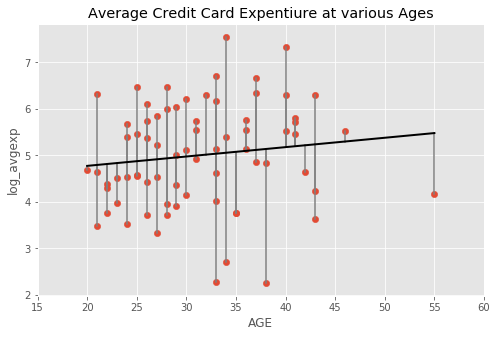

In [117]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(credit_card.AGE, credit_card.log_avgexp, s=40)
ax.set_xlabel('AGE')
ax.set_ylabel('log_avgexp')
ax.set_title('Average Credit Card Expentiure at various Ages')

def make_credit_scatter_line(ax, label='Linear Regression'):
    x = np.linspace(20,55, num=250)
    ax.plot(x, credit_linear_model.coef_[0] + credit_linear_model.coef_[1]*x,
           linewidth=2, c='black', label=label)
    ax.set_xlim(15,60)
    
for index, row in credit_card.iterrows():
    t = row['AGE']
    pred = credit_linear_model.coef_[0] + credit_linear_model.coef_[1]*t
    ax.plot((t,t), (row['log_avgexp'], pred), c='grey')
make_credit_scatter_line(ax)